In [2]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(tidymodels)
  library(readxl)
  library(multcomp)
  library(car)
  library(lmtest)
  library(sandwich)
})

## US Consumption function 1947-2000

In [3]:
df <- read_excel("G:/Datasets/Econometrics BY Example/Excel/Table6_1.xls")
head(df)

year,consumption,income,wealth,interest,lnconsump,lndpi,lnwealth,dlnconsump,dlndpi,⋯,rlnwealth,rinterest,dconsump,dincome,dwealth,rconsump,rincome,rwealth,rinterest2,time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21916,976.4,1035.2,5166.815,-10.350940,6.883873,6.942350,8.550012,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
21916,998.1,1090.0,5280.757,-4.719804,6.905853,6.993933,8.571825,0.02198076,0.051583290,⋯,5.795887,-1.35915709,21.69995,54.800049,113.9419,704.3560,778.5664,3726.352,-1.60578680,2
21916,1025.3,1095.6,5607.351,1.044063,6.932741,6.999057,8.631834,0.02688742,0.005124092,⋯,5.848814,2.57644486,27.20007,5.599976,326.5942,725.0278,767.6801,4018.668,2.46398711,3
21916,1090.9,1192.7,5759.515,0.407346,6.994758,7.083975,8.658608,0.06201744,0.084917545,⋯,5.856105,0.06836937,65.59998,97.099976,152.1641,782.4448,863.0954,4072.578,0.09324604,4
21916,1107.1,1227.0,6086.056,-5.283152,7.009499,7.112328,8.713756,0.01474094,0.028352737,⋯,5.902559,-5.41540527,16.19995,34.300049,326.5410,778.9094,868.1835,4353.341,-5.40569973,5
21916,1142.4,1266.8,6243.864,-0.277011,7.040886,7.144249,8.739354,0.03138733,0.031921864,⋯,5.910253,1.43827367,35.30005,39.800049,157.8076,809.3358,897.6646,4412.911,1.31239307,6


In [4]:
colnames(df)

[1] "year"        "consumption" "income"      "wealth"      "interest"   
 [6] "lnconsump"   "lndpi"       "lnwealth"    "dlnconsump"  "dlndpi"     
[11] "dlnwealth"   "dinterest"   "rlnconsump"  "rlndpi"      "rlnwealth"  
[16] "rinterest"   "dconsump"    "dincome"     "dwealth"     "rconsump"   
[21] "rincome"     "rwealth"     "rinterest2"  "time"

$$
\ln C_T = \beta_1 + \beta_2 \ln DPI_t + \beta_3 \ln W_t + \beta_4 R_t + u_t
$$
real consumption expenditure (C),  
real (after tax) disposable personal income (DPI),   
real wealth (W)   
and real interest rate (R)

In [7]:
model <- lm(lnconsump ~ lndpi + lnwealth +  interest, data =df)
tidy(model)
glance(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.467712044,0.0427779986,-10.933472,7.330410e-15
lndpi,0.804872759,0.0174978490,45.998383,1.376236e-42
lnwealth,0.201270215,0.0175925850,11.440628,1.433544e-15
interest,-0.002689061,0.0007619294,-3.529279,9.046458e-04


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9995597,0.9995332,0.01193375,37832.66,7.120776e-84,3,164.588,-319.1761,-309.2312,0.007120721,50,54


if real personal disposal income goes up by 1%, mean
real consumption expenditure goes up by about 0.8%

if real wealth goes up by 1%, mean real consumption expenditure
goes up by about 0.2%,

if rate goes up by one percentage point, mean real consumption
expenditure goes down by about 0.26%

$R^2$ indicating **spurious correlation**

## Tests of autocorrelation

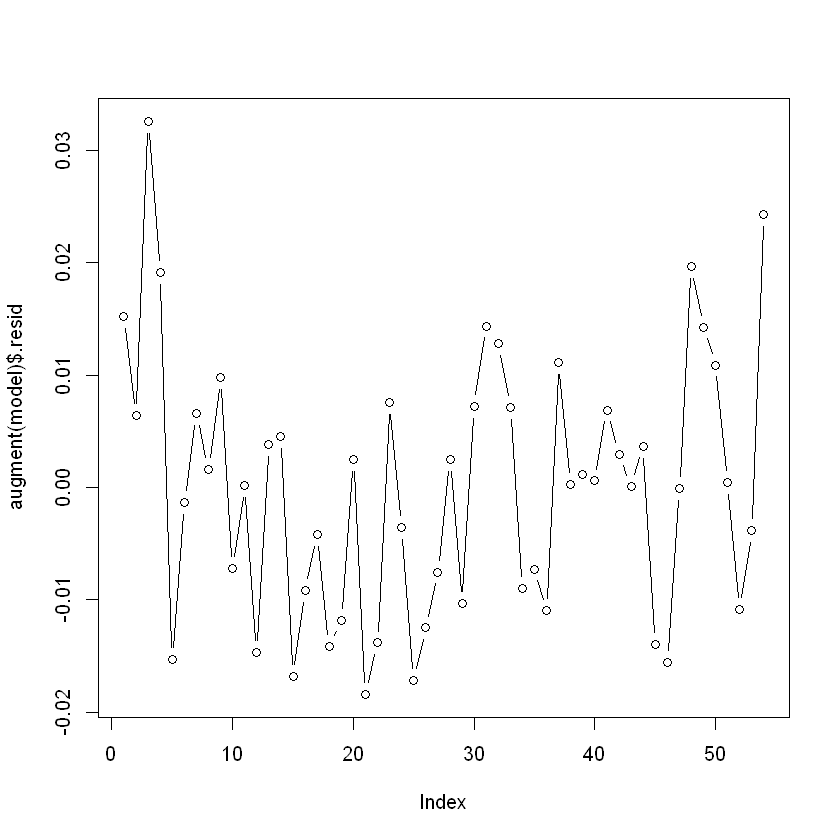

In [21]:
plot(augment(model)$.resid, type = 'b')

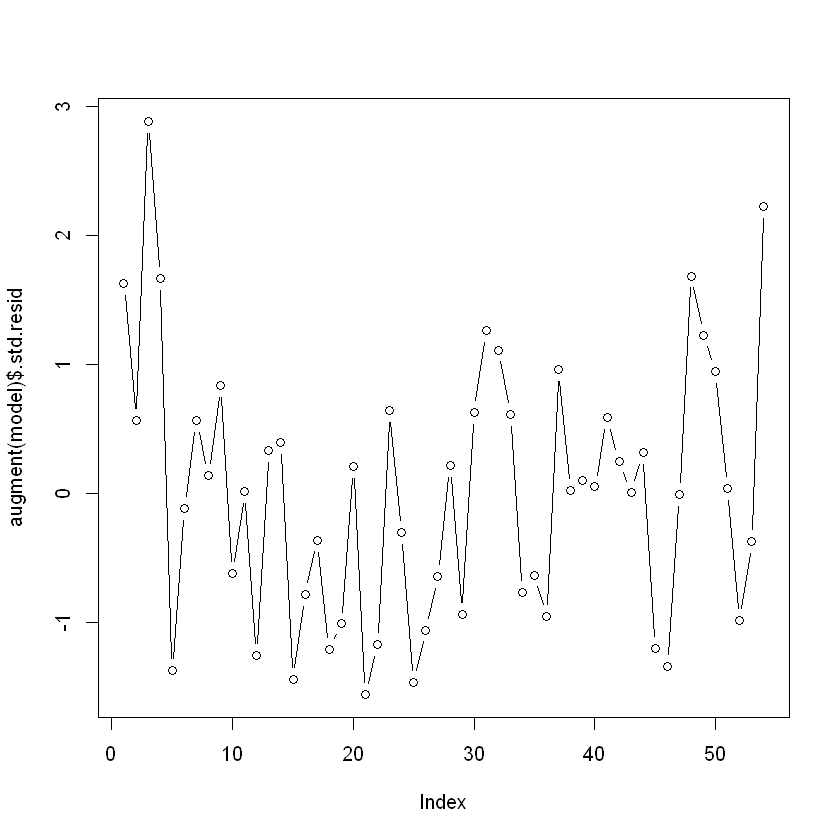

In [22]:
plot(augment(model)$.std.resid, type = 'b')

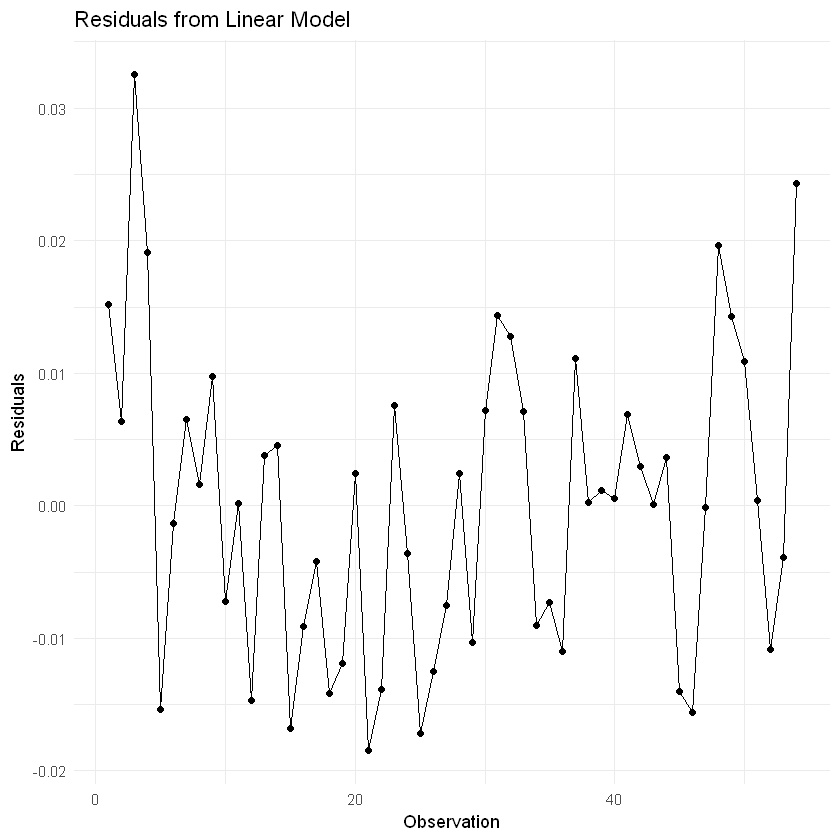

In [18]:
augmented_data <- augment(model)

ggplot(augmented_data, aes(x = seq_along(.resid), y = .resid)) +
  geom_line() +
  geom_point() +
  labs(title = "Residuals from Linear Model",
       x = "Observation",
       y = "Residuals") +
  theme_minimal()

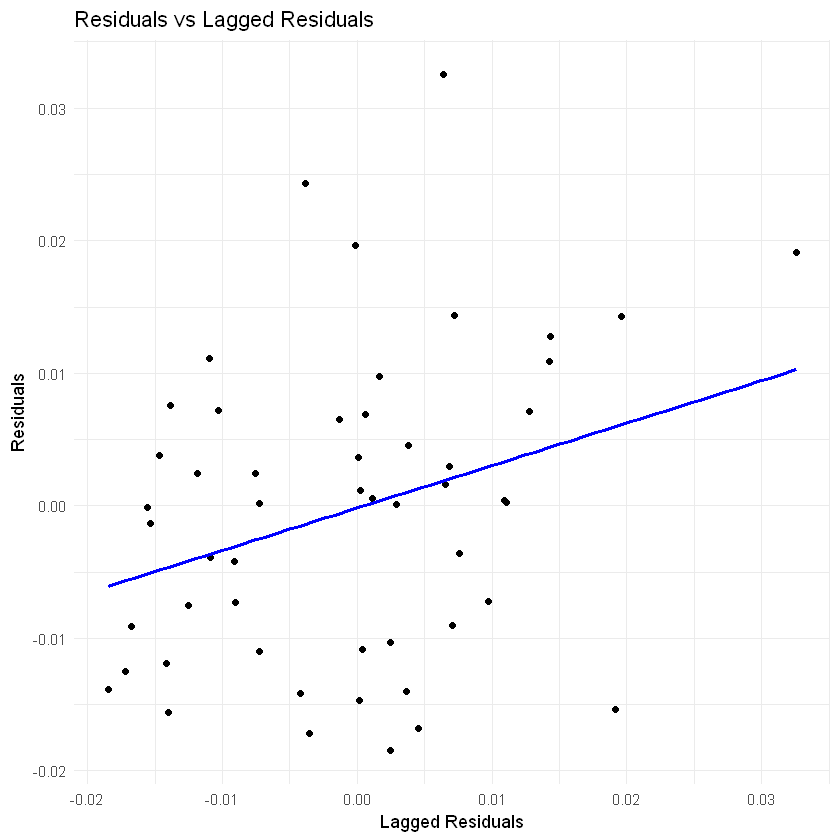

In [14]:
augmented_data <- augmented_data %>%
  mutate(lagged_resid = lag(.resid))

# remove first row of NA lagged residual
augmented_data <- augmented_data %>%
  filter(!is.na(lagged_resid))

correlation <- cor(augmented_data$.resid, augmented_data$lagged_resid)


ggplot(augmented_data, aes(x = lagged_resid, y = .resid)) +
  geom_point() +
  geom_smooth(method = "lm",formula = 'y ~ x', se = FALSE, color = "blue") +
  labs(title = "Residuals vs Lagged Residuals",
       x = "Lagged Residuals",
       y = "Residuals") +
  theme_minimal()

### Durbin watson test

must have an intercept term

In [25]:
durbinWatsonTest(model)

 lag Autocorrelation D-W Statistic p-value
   1       0.2977555      1.289232   0.002
 Alternative hypothesis: rho != 0

In [33]:
durbinWatsonTest(model, max.lag = 3)

 lag Autocorrelation D-W Statistic p-value
   1      0.29775555      1.289232   0.002
   2     -0.02840613      1.933710   0.698
   3      0.01631809      1.678649   0.198
 Alternative hypothesis: rho[lag] != 0

In [34]:
dwtest(model)


	Durbin-Watson test

data:  model
DW = 1.2892, p-value = 0.0009445
alternative hypothesis: true autocorrelation is greater than 0


### Bruech Godfrey general test

In [26]:
bgtest(model, order = 1)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  model
LM test = 5.312, df = 1, p-value = 0.02118


In [27]:
bgtest(model, order = 2)


	Breusch-Godfrey test for serial correlation of order up to 2

data:  model
LM test = 6.4472, df = 2, p-value = 0.03981


In [28]:
bgtest(model, order = 3)


	Breusch-Godfrey test for serial correlation of order up to 3

data:  model
LM test = 6.6573, df = 3, p-value = 0.08366


AR(2) is significant, residuals follow AR(2)

## Remedial measures

### First Difference

$$ u_t - \rho u_{t-1} = v_t $$

\begin{align}
\ln C_t- \rho \ln C_{t-1}&= \beta_{1(1- \rho)} \\  &+ \beta_2 (\ln DPI_t - \rho \ln DPI_{t-1})\\ 
&+ \beta_3 (\ln W_t - \rho \ln W_{t-1}) \\
&+ \beta_4 (R_t - R_{t-1}) \\
&+ (u_t - \rho u_{t-1})
\end{align}

if $\rho$ = 1

$$
\Delta \ln C_t = \beta_2 \Delta \ln DPI_t + \beta_3 \Delta \ln W_t + \beta_4 \Delta R_t + v_t
$$
Called **first difference transformation**

In [36]:
model2 <- lm(diff(lnconsump) ~ 0 +diff(lndpi) + diff(lnwealth) +  diff(interest), data =df)
tidy(model2)
glance(model2)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
diff(lndpi),0.8489940413,0.0515376309,16.4732842,7.667028e-22
diff(lnwealth),0.1063549555,0.0368543147,2.8858210,5.749199e-03
diff(interest),0.0006530138,0.0008260853,0.7904919,4.329740e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9236527,0.9190718,0.0111335,201.6339,6.473553e-28,3,164.7236,-321.4472,-313.5661,0.006197738,50,53


In [40]:
bgtest(model2)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  model2
LM test = 0.86275, df = 1, p-value = 0.353


In [41]:
dwtest(model2)


	Durbin-Watson test

data:  model2
DW = 2.0265, p-value = 0.547
alternative hypothesis: true autocorrelation is greater than 0


In [43]:
durbinWatsonTest(model2)

 lag Autocorrelation D-W Statistic p-value
   1      -0.1150018      2.026542   0.906
 Alternative hypothesis: rho != 0

### feasible generalized least squares (FGLS)

In [51]:
residuals = augment(model)$.resid
residuals

[1]  1.517923e-02  6.394092e-03  3.257863e-02  1.914719e-02 -1.533379e-02
 [6] -1.329901e-03  6.537193e-03  1.620489e-03  9.750152e-03 -7.229259e-03
[11]  1.747589e-04 -1.469759e-02  3.806892e-03  4.542500e-03 -1.678222e-02
[16] -9.139978e-03 -4.222528e-03 -1.414391e-02 -1.187595e-02  2.457122e-03
[21] -1.844129e-02 -1.384277e-02  7.574964e-03 -3.576718e-03 -1.715621e-02
[26] -1.248620e-02 -7.542424e-03  2.456434e-03 -1.028821e-02  7.186174e-03
[31]  1.435852e-02  1.276781e-02  7.091954e-03 -9.031552e-03 -7.266342e-03
[36] -1.096702e-02  1.108902e-02  2.540974e-04  1.161083e-03  5.860762e-04
[41]  6.878115e-03  2.938144e-03  8.798592e-05  3.665043e-03 -1.400249e-02
[46] -1.557970e-02 -1.275365e-04  1.962795e-02  1.427341e-02  1.089118e-02
[51]  4.202595e-04 -1.085875e-02 -3.870382e-03  2.429623e-02

In [54]:
rho <- coef(lm(residuals ~ 0 + lag(residuals)))
rho

lag(residuals) 
     0.3246707

In [55]:
dwtest(model)


	Durbin-Watson test

data:  model
DW = 1.2892, p-value = 0.0009445
alternative hypothesis: true autocorrelation is greater than 0


In [56]:
durbinWatsonTest(model)

 lag Autocorrelation D-W Statistic p-value
   1       0.2977555      1.289232   0.002
 Alternative hypothesis: rho != 0

In [57]:
rho2 = 1 - (1.289232/2) 
rho2

[1] 0.355384

In [67]:
fgls_model <- lm(I(lnconsump-rho*lag(lnconsump)) ~ I(lndpi-rho*lag(lndpi)) + 
                 I(lnwealth-rho*lag(lnwealth)) + I(interest-rho*lag(interest)) , data = df)
tidy(fgls_model)
glance(fgls_model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.797310e-01,0.033726467,-8.2941093,6.807447e-11
I(lndpi - rho * lag(lndpi)),8.187056e-01,0.021096888,38.8069362,1.878713e-38
I(lnwealth - rho * lag(lnwealth)),1.836285e-01,0.020987236,8.7495302,1.396990e-11
I(interest - rho * lag(interest)),-1.799604e-05,0.000969139,-0.0185691,9.852603e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9992348,0.999188,0.0104226,21330.12,2.542681e-76,3,168.756,-327.512,-317.6606,0.005322902,49,53


In [68]:
bgtest(fgls_model)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  fgls_model
LM test = 2.8168, df = 1, p-value = 0.09328


In [69]:
dwtest(fgls_model)


	Durbin-Watson test

data:  fgls_model
DW = 1.449, p-value = 0.008542
alternative hypothesis: true autocorrelation is greater than 0


In [70]:
durbinWatsonTest(fgls_model)

 lag Autocorrelation D-W Statistic p-value
   1       0.2092955      1.448986   0.016
 Alternative hypothesis: rho != 0

In [75]:
library(dynlm)


# Create the FGLS formula
fgls_formula <- as.formula(paste("I(lnconsump - ", rho, "* lag(lnconsump)) ~ ",
                                 "I(lndpi - ", rho, "* lag(lndpi)) + ",
                                 "I(lnwealth - ", rho, "* lag(lnwealth)) + ",
                                 "I(interest - ", rho, "* lag(interest))"
))

# Fit the FGLS model using dynlm
fgls_model <- dynlm(fgls_formula, data = df)

# Tidy model coefficients
tidy(fgls_model)

# Model summary
glance(fgls_model)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.797310e-01,0.033726467,-8.2941093,6.807447e-11
I(lndpi - 0.324670692527429 * lag(lndpi)),8.187056e-01,0.021096888,38.8069362,1.878713e-38
I(lnwealth - 0.324670692527429 * lag(lnwealth)),1.836285e-01,0.020987236,8.7495302,1.396990e-11
I(interest - 0.324670692527429 * lag(interest)),-1.799604e-05,0.000969139,-0.0185691,9.852603e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9992348,0.999188,0.0104226,21330.12,2.542681e-76,3,168.756,-327.512,-317.6606,0.005322902,49,53


In [76]:
library(dynlm)

# Fit the original model
model <- lm(lnconsump ~ lndpi + lnwealth + interest, data = df)

# Get residuals
residuals <- residuals(model)

# Estimate AR(2) coefficients
ar_model <- lm(residuals ~ lag(residuals, 1) + lag(residuals, 2))
rho1 <- coef(ar_model)[2]
rho2 <- coef(ar_model)[3]

# Create the FGLS formula for AR(2)
fgls_formula <- as.formula(paste("I(lnconsump - ", rho1, "* lag(lnconsump, 1) - ", rho2, "* lag(lnconsump, 2)) ~ ",
                                 "I(lndpi - ", rho1, "* lag(lndpi, 1) - ", rho2, "* lag(lndpi, 2)) + ",
                                 "I(lnwealth - ", rho1, "* lag(lnwealth, 1) - ", rho2, "* lag(lnwealth, 2)) + ",
                                 "I(interest - ", rho1, "* lag(interest, 1) - ", rho2, "* lag(interest, 2))"
))


fgls_model <- lm(fgls_formula, data = df)

tidy(fgls_model)

glance(fgls_model)


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.3402025749,0.037997412,-8.9533091,8.307709e-12
"I(lndpi - 0.375966677578179 * lag(lndpi, 1) - -0.159419476639279 * lag(lndpi, 2))",0.8121613433,0.019923567,40.7638520,6.679649e-39
"I(lnwealth - 0.375966677578179 * lag(lnwealth, 1) - -0.159419476639279 * lag(lnwealth, 2))",0.1913213476,0.019988221,9.5717046,1.040704e-12
"I(interest - 0.375966677578179 * lag(interest, 1) - -0.159419476639279 * lag(interest, 2))",-0.0007507104,0.001005589,-0.7465382,4.589834e-01


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9993667,0.9993271,0.01078611,25247.09,9.734735e-77,3,163.8301,-317.6602,-307.904,0.005584327,48,52


### Newey–West method of correcting OLS standard errors

In [85]:
NeweyWest(model)

,(Intercept),lndpi,lnwealth,interest
(Intercept),1.971479e-03,2.692235e-05,-2.333159e-04,2.652791e-05
lndpi,2.692235e-05,2.628983e-04,-2.225614e-04,-6.845951e-06
lnwealth,-2.333159e-04,-2.225614e-04,2.109662e-04,2.866692e-06
interest,2.652791e-05,-6.845951e-06,2.866692e-06,6.724860e-07


## Model Evaluation
consider case of specification error

In [90]:
model4 <- lm(lnconsump ~ log(income) + lnwealth +  interest + lag(lnconsump), data =df)
tidy(model4)
glance(model4)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.316021364,0.0556667072,-5.6770264,7.777927e-07
log(income),0.574833115,0.0696731710,8.2504227,9.237758e-11
lnwealth,0.150288163,0.0208376010,7.2123544,3.477275e-09
interest,-0.000675206,0.0008937643,-0.7554632,4.536624e-01
lag(lnconsump),0.276561599,0.0804719157,3.4367468,1.225013e-03


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.9996454,0.9996159,0.01061906,33833.64,3.891148e-82,4,168.3127,-324.6254,-312.8037,0.005412694,48,53


In [91]:
bgtest(model4)


	Breusch-Godfrey test for serial correlation of order up to 1

data:  model4
LM test = 4.4804, df = 1, p-value = 0.03429
